In [ ]:
# from IPython import display

# import glob
# import imageio
# import matplotlib.pyplot as plt
# import numpy as np
# import PIL
# import tensorflow as tf
# import tensorflow_probability as tfp
# import time

In [ ]:
# ! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [2]:
# ! tar -xvzf lfw.tgz

In [3]:
# face_images = glob.glob('lfw/**/*.jpg')

In [4]:
# all_images = []

# for i in tqdm(face_images):
#   img = load_img(i, target_size=(80,80,3))
#   img = img_to_array(img)
#   img = img/255.
#   all_images.append(img)

In [5]:
# ll_images = np.array(all_images)

# # split data into train and validation data
# train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [6]:
# def pixalate_image(image, scale_percent = 40):
#   width = int(image.shape[1] * scale_percent / 100)
#   height = int(image.shape[0] * scale_percent / 100)
#   dim = (width, height)

#   small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
#   # scale back to original size
#   width = int(small_image.shape[1] * 100 / scale_percent)
#   height = int(small_image.shape[0] * 100 / scale_percent)
#   dim = (width, height)

#   low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

#   return low_res_image

In [7]:
file = open('gola_train.pkl','rb')

X_train = pickle.load(file)
file.close()

In [8]:
file = open('imagenet_subset.pkl','rb')

y_train = pickle.load(file)
# y_train = y_train[3000:6000]

file.close()

In [9]:
file = open('gola_test.pkl','rb')

X_test = pickle.load(file)

file.close()

In [10]:
file = open('imagenet_testset.pkl','rb')

y_test = pickle.load(file)
# y_test = y_test[300:600]

file.close()

In [11]:
file = open('gola_val.pkl','rb')

X_val = pickle.load(file)
# y_test = y_test[300:600]

file.close()

In [12]:
file = open('imagenet_valset.pkl','rb')

y_val = pickle.load(file)
# y_test = y_test[300:600]

file.close()

In [13]:
import cv2
import pandas as pd

In [14]:
def resize_images(img, new_width, new_height):
    size = (new_width, new_height)
    resized_img = cv2.resize(img, size)
    return resized_img

In [15]:
resized_img_Xtrain = [resize_images(img, new_width=80, new_height=80) for img in X_train]
resized_img_Ytrain = [resize_images(img, new_width=80, new_height=80) for img in y_train]
resized_img_Xtest = [resize_images(img, new_width=80, new_height=80) for img in X_test]
resized_img_Ytest = [resize_images(img, new_width=80, new_height=80) for img in y_test]
resized_img_Xval = [resize_images(img, new_width=80, new_height=80) for img in X_val]
resized_img_Yval = [resize_images(img, new_width=80, new_height=80) for img in y_val]




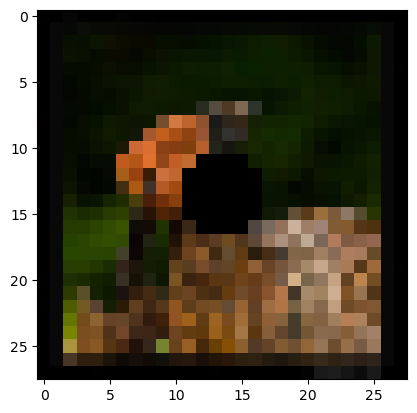

In [16]:
plt.imshow(resized_img_Xval[0])

In [17]:
# for i in range(len(resized_img_Yval)):
#   if resized_img_Yval[i].shape[-1] != 3:
#     pass

#   print(resized_img_Yval[i].shape)

In [18]:
# get low resolution images for the training set
# train_x_px = []
train_x = np.array(resized_img_Ytrain)
train_x = train_x/255.0
test_x = np.array(resized_img_Ytest)
test_x = test_x/255.0
val_x = np.array(resized_img_Yval)
val_x = val_x/255.0
# for i in range(np.array(train_x).shape[0]):
#   temp = pixalate_image(train_x[i,:,:,:])
#   train_x_px.append(temp)

train_x_px = np.array(resized_img_Xtrain)
train_x_px = train_x_px/255.0


# get low resolution images for the validation set
# val_x_px = []

# for i in range(val_x.shape[0]):
#   temp = pixalate_image(val_x[i,:,:,:])
#   val_x_px.append(temp)

test_x_px = np.array(resized_img_Xtest)
test_x_px = test_x_px/255.0

val_x_px = np.array(resized_img_Xval)
val_x_px = val_x_px/255.0

In [19]:
# Input_img = Input(shape=(80, 80, 3))  
# x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
# x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
# x2 = MaxPool2D( (2, 2))(x2)
# encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# # decoding architecture
# x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
# x3 = UpSampling2D((2, 2))(x3)
# x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
# x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
# decoded = Conv2D(3, (3, 3), padding='same')(x1)

# autoencoder = Model(Input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='mse')

In [20]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[80,80]))

encoder.add(Dense(3200,activation="relu"))
encoder.add(Dense(1600,activation="relu"))
encoder.add(Dense(800,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
# encoder.add(Dense(2400,activation="relu"))
# encoder.add(Dense(1200,activation="relu"))
# encoder.add(Dense(600,activation="relu"))
# encoder.add(Dense(300,activation="relu"))
decoder = Sequential()
decoder.add(Dense(400,input_shape=[200],activation='relu'))
decoder.add(Dense(800,activation='relu'))
decoder.add(Dense(1600,activation='relu'))
decoder.add(Dense(3200,activation='relu',input_shape=[2400]))
#decoder.add(Dense(400,activation='relu',input_shape = [200]))
#decoder.add(Dense(800,activation='relu'))
#decoder.add(Dense(1600,activation='relu'))
decoder.add(Dense(6400,activation='sigmoid'))

# decoder.add(Dense(6400, activation="sigmoid"))
#decoder.add(Dense(80*80*3,activation='sigmoid',input_shape=[9600]))
decoder.add(Reshape([80,80]))

autoencoder = Sequential([encoder,decoder])
#autoencoder = Model()
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])
#autoencoder.compile(optimizer='adam', loss='mean_absolute_error',metrics = ['accuracy'])

Metal device set to: Apple M1 Pro


2023-01-28 18:08:37.729596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-28 18:08:37.730158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [22]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [23]:
train_x_px_gray = np.dot(train_x_px[...,:3], [0.2989, 0.5870, 0.1140])
train_x_gray = np.dot(train_x[...,:3], [0.2989, 0.5870, 0.1140])

val_x_px_gray = np.dot(val_x_px[...,:3], [0.2989, 0.5870, 0.1140])
val_x_gray = np.dot(val_x[...,:3], [0.2989, 0.5870, 0.1140])

In [24]:
val_x_gray.shape

(973, 28, 28)

In [25]:
# model=Sequential()

# model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(80,80,1)))
# model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(32, (3,3),activation='relu',padding='same'))
# model.add(MaxPooling2D((2,2), padding='same'))
# model.add(Conv2D(16, (3,3),activation='relu',padding='same'))
# model.add(MaxPooling2D((2,2), padding='same'))

# model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))

# model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
# model.add(UpSampling2D((2,2)))

# model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

# model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

# model.summary()

In [26]:
# a_e = model.fit(train_x_px_gray, train_x_gray,
#             epochs=100,
#             batch_size=32,
#             shuffle=True,
#             validation_data=(val_x_px_gray, val_x_gray),
#             callbacks=[early_stopper]
#             )

In [28]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_x_px_gray, train_x_gray,
            epochs=100,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px_gray, val_x_gray),
            callbacks=[early_stopper]
            )

Epoch 1/100


2023-01-28 18:09:01.067685: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-28 18:09:01.303274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.0359

2023-01-28 18:09:04.960010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/308 [==============================] - 4s 12ms/step - loss: 0.6920 - accuracy: 0.0359 - val_loss: 0.6886 - val_accuracy: 0.0393
Epoch 2/100
308/308 [==============================] - 3s 10ms/step - loss: 0.6782 - accuracy: 0.0486 - val_loss: 0.6564 - val_accuracy: 0.0527
Epoch 3/100
308/308 [==============================] - 3s 10ms/step - loss: 0.6551 - accuracy: 0.0577 - val_loss: 0.6396 - val_accuracy: 0.0586
Epoch 4/100
308/308 [==============================] - 3s 10ms/step - loss: 0.6470 - accuracy: 0.0584 - val_loss: 0.6366 - val_accuracy: 0.0525
Epoch 5/100
308/308 [==============================] - 3s 10ms/step - loss: 0.6441 - accuracy: 0.0575 - val_loss: 0.6397 - val_accuracy: 0.0569
Epoch 6/100
308/308 [==============================] - 3s 10ms/step - loss: 0.6418 - accuracy: 0.0592 - val_loss: 0.6312 - val_accuracy: 0.0545
Epoch 7/100
308/308 [==============================] - 3s 10ms/step - loss: 0.6395 - accuracy: 0.0586 - val_loss: 0.6496 - val_accuracy: 0.0478
Epoc

In [29]:
test_x_px_gray = np.dot(test_x_px[...,:3], [0.2989, 0.5870, 0.1140])

In [30]:
predictions = autoencoder.predict(test_x_px_gray)

31/31 [==============================] - 0s 4ms/step


2023-01-28 18:10:31.032895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [31]:
test_x_px_gray.shape

(985, 28, 28)

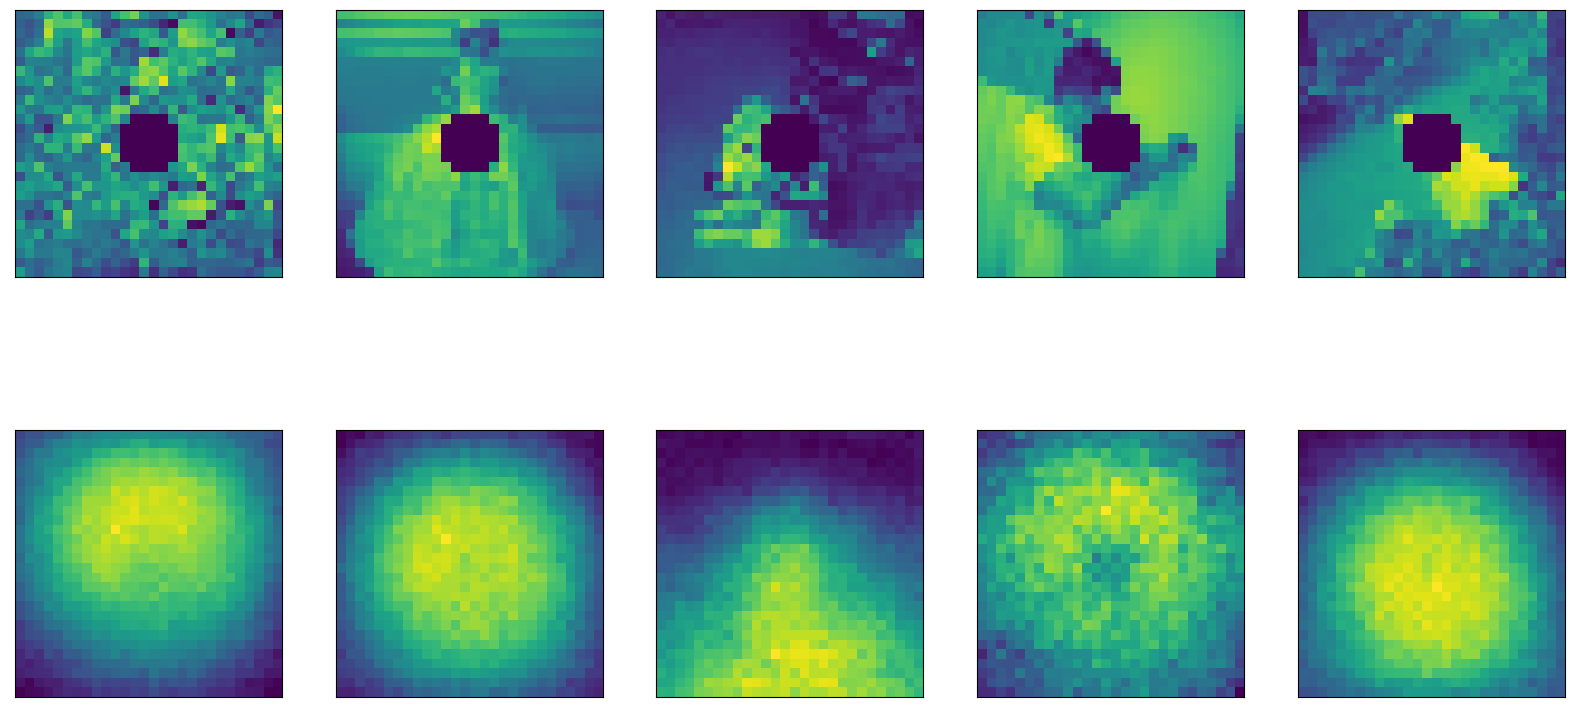

In [32]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px_gray[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
# encoder = tf.keras.models.Sequential()

# encoder.add(tf.keras.layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(128,128,3)))
# encoder.add(tf.keras.layers.MaxPooling2D(2, strides=2))

# encoder.add(tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
# encoder.add(tf.keras.layers.MaxPooling2D(2, strides=2))

# encoder.add(tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'))
# encoder.add(tf.keras.layers.MaxPooling2D(2, strides=2))

# encoder.summary()


In [ ]:
# decoder = tf.keras.models.models.Sequential()

# decoder.add(tf.keras.models.layers.Conv2DTranspose(128, 3, strides=1, padding='same', activation='relu', input_shape= (16,16,128)))
# decoder.add(tf.keras.models.layers.2D(2))

# decoder.add(tf.keras.models.layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'))
# decoder.add(tf.keras.models.layers.UpSampling2D(2))

# decoder.add(tf.keras.models.layers.Conv2D(3, 3, strides=1, padding='same', activation='relu'))
# decoder.add(tf.keras.models.layers.UpSampling2D(2))

# decoder.summary()

In [ ]:
# import numpy as np
# from keras.layers import UpSampling2D,Conv2DTranspose
# from keras.models import Sequential
# model = Sequential()
# model.add(Conv2DTranspose(2, 3, input_shape=(3,3,1)))

# x = np.arange(9).reshape(1,3,3,1)
# x[0,:,:,0]  # this is what x looks like initially

# y = model.predict(x)
# y[0,:,:,0] # this is what it looks like after upsampling

In [ ]:
# import numpy as np
# from keras.layers import UpSampling2D,Conv2DTranspose
# from keras.models import Sequential
# model = Sequential()
# # model.add(Conv2DTranspose(2, 3, input_shape=(3,3,1)))
# model.add(UpSampling2D(size=(2,2), input_shape=(3,3,1)))

# x = np.arange(9).reshape(1,3,3,1)
# x[0,:,:,0]  # this is what x looks like initially

# y = model.predict(x)
# y[0,:,:,0] # this is what it looks like after upsampling

In [ ]:
df = pd.DataFrame(a_e.history)

In [ ]:
df.plot()